In [17]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

In [18]:
pt1 = np.int32([[685, 450],
          [1090, 710],
          [220, 710],
          [650, 450]])

In [19]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    
    if len(img.shape) > 2:  # Check if the image has more than 2 dimensions (i.e., color image)
        channel_count = img.shape[2]
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_img = cv2.bitwise_and(img, mask)
    return masked_img

In [20]:
def color_segmentation(image,masked_color=(0,0,255)):
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    lower_yellow = np.array([165, 157, 0], dtype=np.uint8)
    upper_yellow = np.array([255, 255, 155], dtype=np.uint8)

    lower_white = np.array([200, 200, 200], dtype=np.uint8)
    upper_white = np.array([255, 255, 255], dtype=np.uint8)

    # Create masks for yellow and white regions
    mask_yellow = cv2.inRange(rgb, lower_yellow, upper_yellow)
    mask_white = cv2.inRange(rgb, lower_white, upper_white)

    # Combine masks
    combined_mask = cv2.bitwise_or(mask_yellow, mask_white)
    height = image.shape[0]
    width = image.shape[1]
    region_of_interest_coor = [(0, height), (width//3, height//2.5), (width//2.5, height//2.5), (width, height-30)]
    combined_mask = region_of_interest(combined_mask, np.array([region_of_interest_coor], np.int32))
    inverted_mask = cv2.bitwise_not(combined_mask)
    
    masked_color_image = np.full_like(image, masked_color, dtype=np.uint8)

    # Combine the masked color image with the original image using the inverted mask
    segmented_image = cv2.bitwise_or(cv2.bitwise_and(image, image, mask=inverted_mask), 
                                      cv2.bitwise_and(masked_color_image, masked_color_image, mask=combined_mask))


    return segmented_image

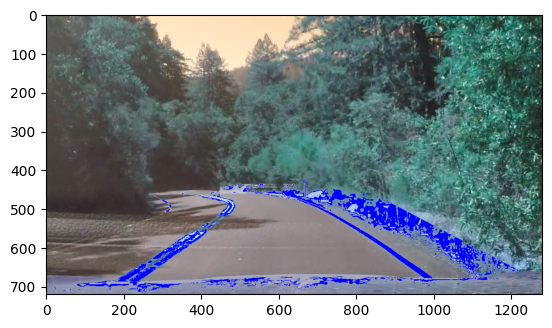

In [21]:
img=cv2.imread('frame_0035.png')
image=color_segmentation(img)
plt.imshow(image)

In [22]:
test_kernel = np.array([[0.1,0.1,0.1],
                         [0.1,0.1,0.1],
                         [0.1,0.1,0.1]])
brightening_kernel = np.array([[0.01, 0.01, 0.01],
                               [0.01, 1.0, 0.01],
                               [0.01, 0.01, 0.01]])
gaussian = (1 / 16.0) * np.array([[1., 2., 1.],
                                  [2., 4., 2.],
                                  [1., 2., 1.]])
gaussian_5x5 = (1/256.0)*np.array([[1., 4., 6., 4., 1.],
                                   [4., 16., 24., 16., 4.],
                                   [6., 24., 36., 24., 6.],
                                   [4., 16., 24., 16., 4.],
                                   ])
Laplacian_gaussain = np.array([[0,1,0],
                              [1,-4,1],
                              [0,1,0]])
edge_enhancement = np.array([[-1,-1,-1],
                             [-1,8,-1],
                             [-1,-1,-1]])
canny=np.array([[-1,0 ,1],
[-2 , 0 , 2],
[-1 , 0,  1]])

test_kernel1 = np.array([[1,0,0],
                        [0,1,0],
                        [0,0,1]])

In [23]:
def kernel_seg(image,kernel):
 brightened=cv2.filter2D(image,-1,kernel)
 image=color_segmentation(brightened)
 return image

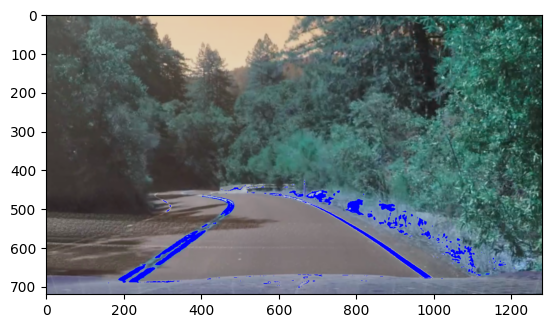

In [24]:
image=kernel_seg(img,test_kernel)
plt.imshow(image)

In [25]:
video = cv2.VideoCapture("videos\harder_challenge_video.mp4")
while True:
    ret,frame=video.read()
    if not ret:
        break
    image=kernel_seg(frame,test_kernel)
    # tl=[550,400]
    # bl=[150,700]
    # tr=[700,400]
    # br=[1200,700]

    # cv2.circle(image,tl,5,[0,0,255],-1,)
    # cv2.circle(image,bl,5,[0,0,255],-1,)
    # cv2.circle(image,br,5,[0,0,255],-1,)
    # cv2.circle(image,tr,5,[0,0,255],-1,)
    cv2.imshow("video",image)
    if cv2.waitKey(25) & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        break

In [26]:
kernel_seg(img,test_kernel)

array([[[ 89,  93,  88],
        [ 90,  93,  89],
        [ 92,  96,  91],
        ...,
        [ 45,  72,  59],
        [ 47,  74,  62],
        [ 49,  76,  63]],

       [[ 88,  92,  88],
        [ 89,  93,  89],
        [ 92,  96,  91],
        ...,
        [ 45,  72,  59],
        [ 47,  74,  62],
        [ 49,  76,  63]],

       [[ 87,  92,  87],
        [ 89,  93,  89],
        [ 93,  97,  92],
        ...,
        [ 47,  74,  61],
        [ 48,  75,  62],
        [ 49,  76,  63]],

       ...,

       [[121, 125, 149],
        [120, 125, 149],
        [120, 125, 149],
        ...,
        [ 87,  96, 111],
        [ 91, 100, 115],
        [ 92, 101, 117]],

       [[121, 125, 149],
        [120, 125, 149],
        [120, 124, 149],
        ...,
        [ 76,  85, 101],
        [ 80,  88, 104],
        [ 81,  90, 105]],

       [[121, 125, 149],
        [120, 125, 149],
        [120, 124, 148],
        ...,
        [ 74,  83,  98],
        [ 76,  85, 101],
        [ 77,  86, 102]]

In [27]:
kernel_seg(img,brightening_kernel)

array([[[106, 110, 105],
        [108, 112, 107],
        [110, 115, 109],
        ...,
        [ 35,  68,  52],
        [ 41,  74,  59],
        [ 42,  74,  59]],

       [[106, 110, 105],
        [107, 111, 106],
        [110, 115, 109],
        ...,
        [ 61,  93,  78],
        [ 67,  99,  84],
        [ 67, 100,  85]],

       [[104, 110, 105],
        [104, 110, 105],
        [110, 115, 109],
        ...,
        [ 61,  94,  78],
        [ 67, 100,  84],
        [ 67, 100,  85]],

       ...,

       [[145, 150, 179],
        [145, 150, 179],
        [144, 149, 178],
        ...,
        [ 98, 109, 127],
        [107, 118, 136],
        [111, 122, 140]],

       [[145, 150, 179],
        [145, 150, 179],
        [144, 149, 178],
        ...,
        [ 90, 101, 119],
        [ 94, 105, 123],
        [ 97, 108, 126]],

       [[145, 150, 179],
        [145, 150, 179],
        [144, 149, 178],
        ...,
        [ 87,  97, 116],
        [ 88,  99, 117],
        [ 89, 100, 118]]

In [28]:
kernel_seg(img,gaussian)

array([[[ 99, 103,  98],
        [100, 104,  99],
        [102, 106, 101],
        ...,
        [ 45,  75,  61],
        [ 48,  78,  64],
        [ 50,  80,  66]],

       [[ 98, 102,  98],
        [ 99, 104,  98],
        [102, 106, 101],
        ...,
        [ 52,  82,  68],
        [ 55,  85,  71],
        [ 56,  86,  72]],

       [[ 96, 102,  97],
        [ 98, 103,  98],
        [103, 107, 102],
        ...,
        [ 53,  83,  69],
        [ 56,  86,  72],
        [ 56,  86,  72]],

       ...,

       [[134, 139, 166],
        [134, 139, 166],
        [133, 138, 165],
        ...,
        [ 95, 105, 122],
        [100, 110, 127],
        [103, 113, 130]],

       [[134, 139, 166],
        [134, 139, 166],
        [133, 138, 165],
        ...,
        [ 84,  94, 111],
        [ 88,  98, 115],
        [ 90, 100, 117]],

       [[134, 139, 166],
        [134, 139, 166],
        [133, 138, 165],
        ...,
        [ 82,  92, 108],
        [ 84,  94, 111],
        [ 85,  95, 112]]

In [29]:
kernel_seg(img,gaussian_5x5)

array([[[ 93,  97,  92],
        [ 94,  98,  93],
        [ 96, 100,  95],
        ...,
        [ 44,  72,  59],
        [ 47,  76,  62],
        [ 49,  77,  64]],

       [[ 92,  97,  92],
        [ 93,  97,  93],
        [ 96, 100,  95],
        ...,
        [ 47,  75,  62],
        [ 51,  79,  66],
        [ 52,  80,  67]],

       [[ 91,  96,  92],
        [ 93,  97,  93],
        [ 97, 101,  96],
        ...,
        [ 48,  76,  63],
        [ 50,  78,  65],
        [ 50,  79,  65]],

       ...,

       [[126, 130, 156],
        [125, 130, 155],
        [125, 130, 155],
        ...,
        [ 92, 101, 117],
        [ 95, 105, 121],
        [ 97, 106, 122]],

       [[126, 130, 156],
        [125, 130, 155],
        [125, 129, 155],
        ...,
        [ 81,  91, 107],
        [ 84,  94, 109],
        [ 85,  95, 111]],

       [[126, 130, 156],
        [125, 130, 155],
        [125, 129, 155],
        ...,
        [ 77,  87, 103],
        [ 80,  89, 105],
        [ 80,  90, 106]]

In [30]:
kernel_seg(img,Laplacian_gaussain)

array([[[ 4,  4,  4],
        [ 0,  0,  0],
        [ 1,  1,  1],
        ...,
        [56, 56, 56],
        [46, 46, 46],
        [52, 52, 52]],

       [[ 0,  2,  2],
        [ 0,  2,  2],
        [ 2,  2,  2],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 1,  0,  0],
        [ 9,  5,  5],
        [ 3,  5,  5],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 2,  2,  2],
        ...,
        [22, 22, 22],
        [ 2,  2,  2],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 5,  5,  5],
        [12, 12, 12],
        [14, 14, 14]]], dtype=uint8)

In [31]:
kernel_seg(img,edge_enhancement)

array([[[ 0,  0,  0],
        [ 2,  2,  2],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [66, 66, 66],
        [96, 96, 96],
        [78, 78, 78]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [46, 46, 46],
        [88, 88, 88],
        [78, 78, 78]],

       ...,

       [[ 0,  0,  0],
        [ 2,  2,  2],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 4,  4,  4]],

       [[ 0,  0,  0],
        [ 3,  3,  3],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 1,  1,  1]],

       [[ 0,  0,  0],
        [ 3,  3,  3],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

In [32]:
kernel_seg(img,canny)

array([[[ 0,  0,  0],
        [16, 16, 16],
        [26, 26, 26],
        ...,
        [32, 32, 32],
        [24, 24, 24],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [18, 16, 16],
        [33, 31, 31],
        ...,
        [32, 32, 32],
        [24, 24, 24],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [26, 20, 20],
        [47, 41, 41],
        ...,
        [20, 20, 20],
        [16, 16, 16],
        [ 0,  0,  0]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [41, 41, 41],
        [41, 41, 41],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [30, 30, 30],
        [29, 29, 29],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [20, 20, 20],
        [18, 18, 18],
        [ 0,  0,  0]]], dtype=uint8)